<a href="https://colab.research.google.com/github/modichirag/flowpm/blob/master/notebooks/flowpm_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run this if you are on colab
!pip install git+https://github.com/modichirag/flowpm.git
!git clone https://github.com/modichirag/flowpm.git 

In [2]:
%pylab inline
import tensorflow as tf
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline as iuspline

# You may need to adapt this path depending on where you are running the notebook
# This is the power spectrum of initial conditions
klin = np.loadtxt('flowpm/flowpm/data/Planck15_a1p00.txt').T[0]
plin = np.loadtxt('flowpm/flowpm/data/Planck15_a1p00.txt').T[1]

ipklin = iuspline(klin, plin)

Populating the interactive namespace from numpy and matplotlib


In [3]:
import flowpm

stages = np.linspace(0.1, 1.0, 10, endpoint=True)

initial_conditions = flowpm.linear_field(32,          # size of the cube
                                         100,         # Physical size of the cube
                                         ipklin,      # Initial powerspectrum
                                         batch_size=16)

# Sample particles
state = flowpm.lpt_init(initial_conditions, a0=0.1)   

# Evolve particles down to z=0
final_state = flowpm.nbody(state, stages, 32)         

# Retrieve final density field
final_field = flowpm.cic_paint(tf.zeros_like(initial_conditions), final_state[0])

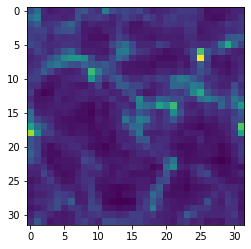

In [4]:
imshow(final_field[0].numpy().sum(axis=0))